## Müşteri Yorumları Projesi

### Veri Seti: HepsiBurada'da Ürünlere Yapılan Müşteri Yorumları

Toplam 243797 veri bulunmaktadır

İki sütundan oluşmaktadır. Biri Değerlendirme, diğeri Müşteri Yorumu sütunudur.

Değerlendirmesi 1 olarak işaretlenenler pozitif , 0 olanlar ise negatif yorum kategorisindedir.

Biz bu projede verileri önişlemeden geçirerek, normalizasyon yapıp vektör şeklinde gösterdikten sonra farklı makine öğrenmesi algoritmalarını da deneyerek, en son yapay sinir ağlarını da kullandıktan sonra accuracy karşılaştırması yapıp, en iyi modeli belirledikten sonra verdiğimiz örneklerden hangisinin pozitif hangisinin negatif olduğunu bilgisayarın anlamasını sağlamak istiyoruz.

### Gerekli Kütüphaneleri Ekliyoruz

In [1]:
#Importing Essentials
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import numpy as np
import re
from textblob import TextBlob
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('turkish')
nltk.download('words')
words = set(nltk.corpus.words.words())
from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Veri setini pandas ile okuyoruz.

In [3]:
complaints = pd.read_csv("hepsiburadaveriseti.txt")
df=complaints

Veri setinin ilk beş verisini görüntüleyelim.

In [4]:
df.head()

,Değerlendirme,Müşteri Yorumu
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


İki sütun (öznitelik) var, Değerlendirme ve Müşteri Yorumu olmak üzere. Değerlendirme integer veri tipinde, Müşteri Yorumu sütunu da object veri tipindedir, 243497 veri var ve hiç eksik gözlem bulunmamaktadır.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Değerlendirme   243497 non-null  int64 
 1   Müşteri Yorumu  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [10]:
df.shape

(243497, 2)

Değerlendirme sütunu integer veri tipindedir ve farklı olarak 2 değer almaktadır. 

In [11]:
df["Değerlendirme"].nunique()

2

0-1 olarak iki değer almaktadır.

In [12]:
df["Değerlendirme"].unique()

array([1, 0], dtype=int64)

In [13]:
df["Müşteri Yorumu"].nunique()

214662

In [14]:
df.columns

Index(['Değerlendirme', 'Müşteri Yorumu'], dtype='object')

In [15]:
df["Müşteri Yorumu"]=df["Müşteri Yorumu"].astype(str)

In [17]:
df["Müşteri Yorumu"].head(5)

0                              3 yıldır tık demedi. :)
1                        3 yıldır kullanıyorum müthiş 
2    Ürün bugün elime geçti çok fazla inceleme fırs...
3    Almaya karar verdim. Hemencecik geldi. Keyifle...
4    Günlük kullanımınızı çok çok iyi karsılıyor kı...
Name: Müşteri Yorumu, dtype: object

İlk veri önişleme adımında tüm büyük harfleri küçük harfe dönüştürerek tüm yorumları standardize ediyoruz.

In [18]:
df["Müşteri Yorumu"]= df["Müşteri Yorumu"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [19]:
df["Müşteri Yorumu"].head(5)

0                              3 yıldır tık demedi. :)
1                         3 yıldır kullanıyorum müthiş
2    ürün bugün elime geçti çok fazla inceleme fırs...
3    almaya karar verdim. hemencecik geldi. keyifle...
4    günlük kullanımınızı çok çok iyi karsılıyor kı...
Name: Müşteri Yorumu, dtype: object

## Removing Punctutation

Veriden noktalama işaretlerini kaldırıyoruz.

In [20]:
df["Müşteri Yorumu"]= df["Müşteri Yorumu"].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

In [21]:
df["Müşteri Yorumu"].head(5)

0                              3 yıldır tık demedi    
1                         3 yıldır kullanıyorum müthiş
2    ürün bugün elime geçti çok fazla inceleme fırs...
3    almaya karar verdim  hemencecik geldi  keyifle...
4    günlük kullanımınızı çok çok iyi karsılıyor kı...
Name: Müşteri Yorumu, dtype: object

## Removing Stopwords

Türkçede anlama pek de katkısı olmayan sözcükleri çıkartıyoruz.

In [22]:
df["Müşteri Yorumu"]= df["Müşteri Yorumu"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [23]:
df["Müşteri Yorumu"].head(5)

0                                  3 yıldır tık demedi
1                         3 yıldır kullanıyorum müthiş
2    ürün bugün elime geçti fazla inceleme fırsatım...
3    almaya karar verdim hemencecik geldi keyifle k...
4    günlük kullanımınızı iyi karsılıyor kısaca mük...
Name: Müşteri Yorumu, dtype: object

## Removing Digits

Veri setinden sayıları çıkartıyoruz.

In [24]:
df['Müşteri Yorumu']= df['Müşteri Yorumu'].str.replace('\d','')

In [25]:
df["Müşteri Yorumu"].head(5)

0                                    yıldır tık demedi
1                           yıldır kullanıyorum müthiş
2    ürün bugün elime geçti fazla inceleme fırsatım...
3    almaya karar verdim hemencecik geldi keyifle k...
4    günlük kullanımınızı iyi karsılıyor kısaca mük...
Name: Müşteri Yorumu, dtype: object

Veriden whitespaceleri kaldırıyoruz.

In [27]:
df['Müşteri Yorumu']= df['Müşteri Yorumu'].str.strip()

In [28]:
df["Müşteri Yorumu"].head(5)

0                                    yıldır tık demedi
1                           yıldır kullanıyorum müthiş
2    ürün bugün elime geçti fazla inceleme fırsatım...
3    almaya karar verdim hemencecik geldi keyifle k...
4    günlük kullanımınızı iyi karsılıyor kısaca mük...
Name: Müşteri Yorumu, dtype: object

Çoklu whitespaceleri de kaldıralım.

In [29]:
df["Müşteri Yorumu"] = df["Müşteri Yorumu"].replace('\s+', ' ', regex=True)

In [30]:
df["Müşteri Yorumu"].head(5)

0                                    yıldır tık demedi
1                           yıldır kullanıyorum müthiş
2    ürün bugün elime geçti fazla inceleme fırsatım...
3    almaya karar verdim hemencecik geldi keyifle k...
4    günlük kullanımınızı iyi karsılıyor kısaca mük...
Name: Müşteri Yorumu, dtype: object

Müşteri yorumlarında hiç boş veri bulunmamaktadır.

In [32]:
df["Müşteri Yorumu"].isna().sum()

0

In [33]:
nan_values=df[df["Müşteri Yorumu"]=="nan"]
nan_values[["Müşteri Yorumu"]]

,Müşteri Yorumu


In [34]:
nan_values_index = nan_values.index

In [35]:
df.drop(index=nan_values.index,inplace=True)

Önişlemeden geçirdiğimiz veri setini excel dosyasına dönüştürüp bundan sonra bu dosyadan devam edeceğiz.

In [36]:
df.to_excel('Preprocessed_consumer_complaints.xlsx')

Gerekli kütüphaneleri import edelim ve indirilmesi gereken wordcloud/gensim gibi kütüphaneleri de yükleyelim. Daha sonra yorum satırına alabiliriz.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud 
import re
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import xgboost
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
#!pip install gensim
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec,KeyedVectors
from gensim.summarization import summarize
from gensim.summarization import keywords
from sklearn import svm
sns.set(font_scale=1.4)
from warnings import filterwarnings
filterwarnings('ignore')

Veriyi pandas ile excel dosyasından okuyalım.

In [38]:
complaints = pd.read_excel("Preprocessed_consumer_complaints.xlsx")
df=complaints

Tekrar ilk beş yorumu gözlemleyelim.

In [40]:
df.head()

,Unnamed: 0,Değerlendirme,Müşteri Yorumu
0,0,1,yıldır tık demedi
1,1,1,yıldır kullanıyorum müthiş
2,2,1,ürün bugün elime geçti fazla inceleme fırsatım...
3,3,1,almaya karar verdim hemencecik geldi keyifle k...
4,4,1,günlük kullanımınızı iyi karsılıyor kısaca mük...


Tabloya baktığımızda Unnamed:0 adında bir sütun oluştuğunu görüyoruz ve bunu da kaldıralım. Dikey olarak kaldıracağız. Bu yüzden axis = 1 kullanıldı ve değişiklik kalıcı hale getirildi.

In [39]:
df.drop("Unnamed: 0",axis=1,inplace=True)

Tekrar görüntülediğimizde silindiğini görüyoruz.

In [41]:
df.head()

,Değerlendirme,Müşteri Yorumu
0,1,yıldır tık demedi
1,1,yıldır kullanıyorum müthiş
2,1,ürün bugün elime geçti fazla inceleme fırsatım...
3,1,almaya karar verdim hemencecik geldi keyifle k...
4,1,günlük kullanımınızı iyi karsılıyor kısaca mük...


In [42]:
df.isna().sum()

Değerlendirme     0
Müşteri Yorumu    0
dtype: int64

In [43]:
df.shape

(243497, 2)

**Müşteri Yorumları Word Cloud**

Müşteri yorumlarında geçen textlere göre en çok geçen kelimeler en büyük gösterilecek şekilde bir sözcük bulutu oluşturabiliriz. Bu şekilde daha görsel bir şekilde en çok geçen kelimeleri görebiliriz.

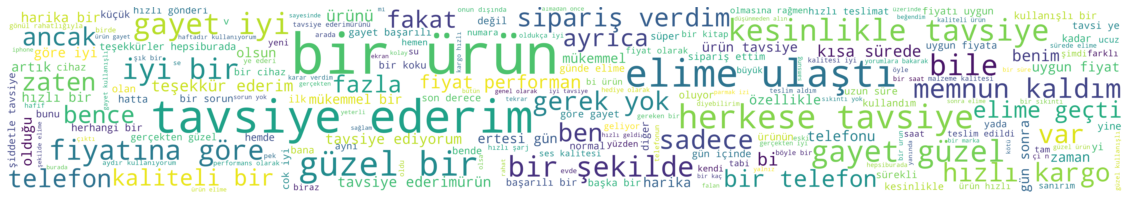

In [44]:
text = []
for i in df["Müşteri Yorumu"]:
    text.append(i)
text = ''.join(map(str, text)) 
wordcloud = WordCloud(width=6000, height=1000, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Olumlu/Olumsuz Yorumların Dağılımı**

In [45]:
df.groupby("Değerlendirme").count().reset_index()

,Değerlendirme,Müşteri Yorumu
0,0,13676
1,1,229821


Negatif yorumlar 13676, pozitif yorumlar ise 229821 adettir. Pozitif yorumların çok fazla olduğunu görüyoruz.

In [46]:
df["Değerlendirme"].value_counts(normalize=True)

1    0.943835
0    0.056165
Name: Değerlendirme, dtype: float64

1 olan yorumları normalize ettiğimizde 0 'a göre çok yüksek olduğunu görebiliriz.

##  VECTORIZER

Veri setini vektörize ederek bilgisayarın anlayacağı şekle dönüştürüyoruz.

### Train Test

In [47]:
df["Müşteri Yorumu"]=df["Müşteri Yorumu"].astype('U')

Veri setini eğitim ve test seti olmak üzere ikiye ayırıyoruz. X bağımsız , y bağımlı değişkendir.

In [48]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["Müşteri Yorumu"],
                                                                   df["Değerlendirme"], 
                                                                    random_state = 1)

Eğitim ve test verilerini görüntüleyelim.

In [49]:
train_x

43288                           çekiş gücü sesi oldukça iyi
208872                            iş görüyor tavsiye ederim
37760     hızlı bir gönderi süreci var vestfrost vestel ...
199797    iyi bir diyet bence bende yeni uygulamaya başl...
98266     üzerinde metre yazıyor içinden çıkan metre har...
                                ...                        
229119    kurulumu kolay hızlı çalışırken fazla ısınmıyo...
5192      yeni telefon alırken yanında bunu alayım dedim...
208780    güne kadar kaç tane araç telefon tutucu aldım ...
229611    wd ürünlerinden memnunum şimdiye kadar sorun ç...
128037    memnun kaldım herkese tavsiye ederim uzun süre...
Name: Müşteri Yorumu, Length: 182622, dtype: object

In [50]:
train_y

43288     1
208872    1
37760     1
199797    1
98266     0
         ..
229119    1
5192      1
208780    1
229611    1
128037    1
Name: Değerlendirme, Length: 182622, dtype: int64

In [51]:
test_x

181854                                          gayet güzel
31224     tek kelime mükemmel telefon bir kere ısınma so...
230842    gayet kullanışlı bir ürün özenli paketleme hız...
128932    güzel bi ürün tüp bitmeden göz altlarımda beli...
176255                          üzerinden puan verdim süper
                                ...                        
222963    annem aldım tereddüt ettim fiyatına göre gayet...
91933     kargolama teslimat süreci son derece hızlıydı ...
96076     önce manuel olan üründen almıştık eşimin canın...
172184    çocuğumuzda başka bez kullanmadık kaliteli kam...
104434    ürünü iki haftadır kullanıyorum memnunum fiyat...
Name: Müşteri Yorumu, Length: 60875, dtype: object

In [52]:
test_y

181854    1
31224     1
230842    1
128932    1
176255    1
         ..
222963    1
91933     1
96076     1
172184    1
104434    1
Name: Değerlendirme, Length: 60875, dtype: int64

Test setinde y bağımlı değişkeninin normalize edilmiş hali.

In [57]:
test_y.value_counts(normalize=True)

1    0.943441
0    0.056559
Name: Değerlendirme, dtype: float64

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

X_train ve X_test değişkenlerini train_x ve test_x'den vektörize ederek dönüştürdük.

In [59]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
X_train = vectorizer.transform(train_x)
X_test  = vectorizer.transform(test_x)

In [60]:
type(X_train)

scipy.sparse.csr.csr_matrix

## Machine Learning Algoritmaları

### Naive Bayes

In [54]:
nb = naive_bayes.MultinomialNB()

In [55]:
nb_model = nb.fit(X_train,train_y)
accuracy = model_selection.cross_val_score(nb_model, 
                                           X_test, 
                                           test_y, 
                                           cv = 100).mean()
y_pred=nb_model.predict(X_test)
print(metrics.classification_report(test_y,y_pred,digits=3))
print("Naive Bayes Accuracy:", accuracy)

              precision    recall  f1-score   support

           0      0.852     0.270     0.410      3443
           1      0.958     0.997     0.977     57432

    accuracy                          0.956     60875
   macro avg      0.905     0.634     0.694     60875
weighted avg      0.952     0.956     0.945     60875

Naive Bayes Accuracy: 0.9459059286146397


Naive Bayes Accuracy : 0.946
Bizim veri setimiz ve problemimiz için bu algoritma gayet uygun görünüyor.

Grafiğini gösterelim.

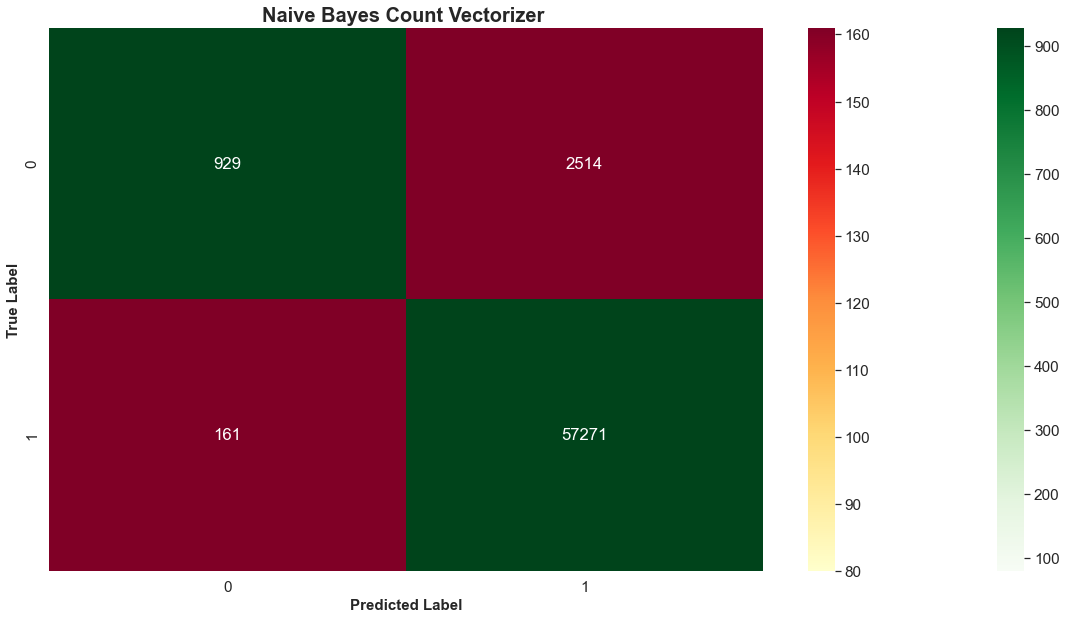

In [51]:
plt.figure(figsize=(20,10))
cm = confusion_matrix(test_y, y_pred)
class_label = [sorted(set(df["Değerlendirme"]))]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
off_diag_mask = np.eye(*df_cm.shape, dtype=bool)
sns.heatmap(df_cm,mask=~off_diag_mask, cmap='Greens', annot=True, fmt='d',vmax=80)
sns.heatmap(df_cm,mask=off_diag_mask, cmap='YlOrRd', annot=True, fmt='d',vmax=80)
plt.title("Naive Bayes Count Vectorizer ",fontweight="bold",fontsize=20)
plt.xlabel("Predicted Label",fontweight="bold",fontsize=15)
plt.ylabel("True Label",fontweight="bold",fontsize=15)
plt.show()

### Random Forest

Çok uzun sürüyor.

In [26]:
rf = ensemble.RandomForestClassifier()


In [ ]:
rf_model = rf.fit(X_train,train_y)
accuracy = model_selection.cross_val_score(rf_model, 
                                           X_test, 
                                           test_y, 
                                           cv = 1000).mean()
y_pred=rf_model.predict(X_test)
print(metrics.classification_report(test_y,y_pred,digits=3))
print("Random Forest Count Vectorizer Accuracy:", accuracy)

In [ ]:
plt.figure(figsize=(20,10))
cm = confusion_matrix(test_y, y_pred)
class_label = [sorted(set(df["Değerlendirme"]))]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
off_diag_mask = np.eye(*df_cm.shape, dtype=bool)
sns.heatmap(df_cm,mask=~off_diag_mask, cmap='Greens', annot=True, fmt='d',vmax=80)
sns.heatmap(df_cm,mask=off_diag_mask, cmap='YlOrRd', annot=True, fmt='d',vmax=80)
plt.title("Random Forest Count Vectorizer",fontweight="bold",fontsize=20)
plt.xlabel("Predicted Label",fontweight="bold",fontsize=15)
plt.ylabel("True Label",fontweight="bold",fontsize=15)
plt.show()

### Logistic Regression

In [52]:
loj = linear_model.LogisticRegression()

In [53]:
loj_model = loj.fit(X_train,train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           X_test, 
                                           test_y, 
                                           cv = 100).mean()
y_pred=loj_model.predict(X_test)
print(metrics.classification_report(test_y,y_pred,digits=3))
print("Logistic Regression Word-Level TF-IDF Accuracy:", accuracy)

              precision    recall  f1-score   support

           0      0.775     0.535     0.633      3443
           1      0.973     0.991     0.982     57432

    accuracy                          0.965     60875
   macro avg      0.874     0.763     0.807     60875
weighted avg      0.961     0.965     0.962     60875

Logistic Regression Word-Level TF-IDF Accuracy: 0.9599026661481291


Text(152.5, 0.5, 'True Label')

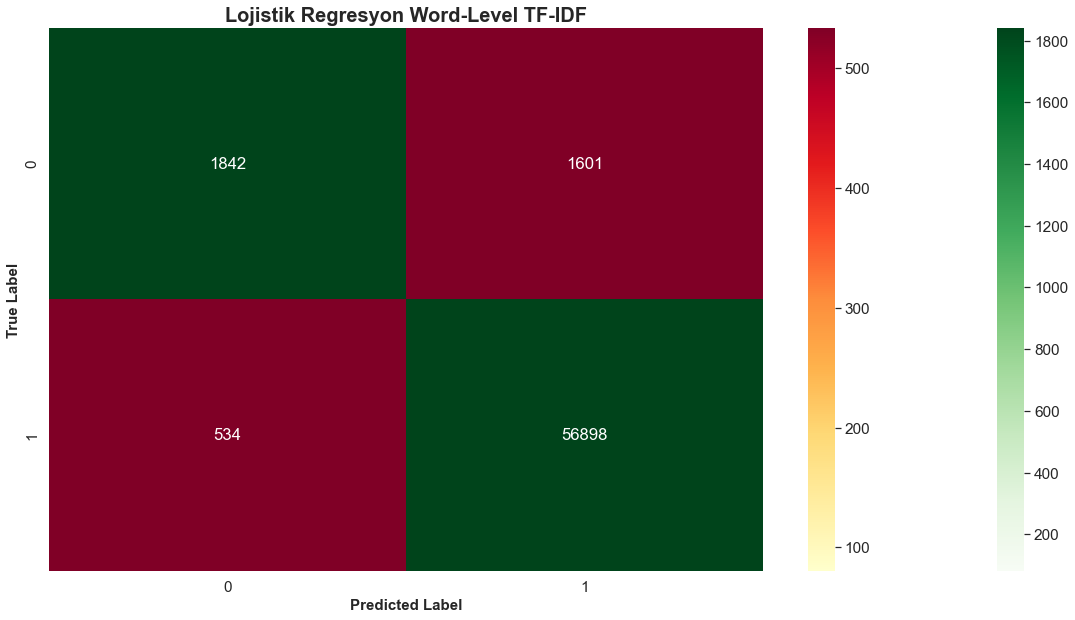

In [55]:
plt.figure(figsize=(20,10))
cm = confusion_matrix(test_y, y_pred)
class_label = [sorted(set(df["Değerlendirme"]))]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
off_diag_mask = np.eye(*df_cm.shape, dtype=bool)
sns.heatmap(df_cm,mask=~off_diag_mask, cmap='Greens', annot=True, fmt='d',vmax=80)
sns.heatmap(df_cm,mask=off_diag_mask, cmap='YlOrRd', annot=True, fmt='d',vmax=80)
plt.title("Lojistik Regresyon Word-Level TF-IDF",fontweight="bold",fontsize=20)
plt.xlabel("Predicted Label",fontweight="bold",fontsize=15)
plt.ylabel("True Label",fontweight="bold",fontsize=15)

### XGBoost

Bu algoritma hakkında bilgi

In [56]:
xgb = xgboost.XGBClassifier()

In [57]:
xgb_model = xgb.fit(X_train,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           X_test,
                                           test_y, 
                                           cv = 10).mean()
y_pred=xgb_model.predict(X_test)
print(metrics.classification_report(test_y,y_pred,digits=3))
print("XGBoost Count Vectorizer Accuracy:", accuracy)

[23:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Text(152.5, 0.5, 'True Label')

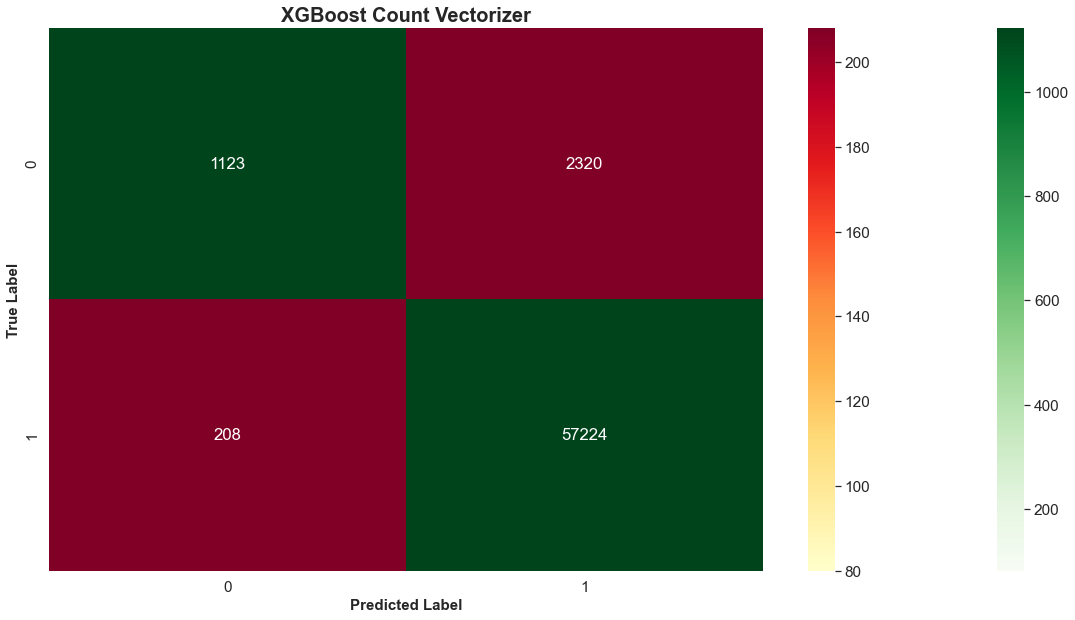

In [58]:
plt.figure(figsize=(20,10))
cm = confusion_matrix(test_y, y_pred)
class_label = [sorted(set(df["Değerlendirme"]))]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
off_diag_mask = np.eye(*df_cm.shape, dtype=bool)
sns.heatmap(df_cm,mask=~off_diag_mask, cmap='Greens', annot=True, fmt='d',vmax=80)
sns.heatmap(df_cm,mask=off_diag_mask, cmap='YlOrRd', annot=True, fmt='d',vmax=80)
plt.title("XGBoost Count Vectorizer",fontweight="bold",fontsize=20)
plt.xlabel("Predicted Label",fontweight="bold",fontsize=15)
plt.ylabel("True Label",fontweight="bold",fontsize=15)

## WORD2VEC VECTORIZATION

**Consumer Declaration Özniteliğinin List of List Yapısına Dönüştürme İşlemleri**

In [90]:
train_x, train_y, test_x , test_y = model_selection.train_test_split(df["Müşteri Yorumu"],
                                                                   df["Değerlendirme"], 
                                                                    random_state = 1)

In [57]:
def review_wordlist(review):
    words = review.split()
    words = [w.strip() for w in words]
    
    return(words)

In [58]:
def review_sentences(review):
    raw_sentences = sent_tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence.strip()))
    return sentences

In [59]:
complaints = []
print("Parsing sentences from training set")
for complain in train_x:
    complaints += review_sentences(complain)

Parsing sentences from training set


In [63]:
complaints

[['çekiş', 'gücü', 'sesi', 'oldukça', 'iyi'],
 ['iş', 'görüyor', 'tavsiye', 'ederim'],
 ['hızlı',
  'bir',
  'gönderi',
  'süreci',
  'var',
  'vestfrost',
  'vestel',
  'in',
  'satın',
  'almış',
  'olduğu',
  'önceden',
  'danimarkalı',
  'olan',
  'bir',
  'firma',
  'garantisi',
  'kurulumu',
  'üretimi',
  'vestel',
  'bünyesinde',
  'son',
  'derece',
  'kaliteli',
  'bir',
  'ürün',
  'tavsiye',
  'ederim'],
 ['iyi',
  'bir',
  'diyet',
  'bence',
  'bende',
  'yeni',
  'uygulamaya',
  'başladım',
  'azimliyim',
  'şuanda',
  'tabi',
  'basındayım',
  'sonucları',
  'sizinle',
  'paylaşacağım',
  'sağlıklı',
  'yaşamak',
  'dileğiyle'],
 ['üzerinde',
  'metre',
  'yazıyor',
  'içinden',
  'çıkan',
  'metre',
  'harici',
  'yapışması',
  'falan',
  'iyi',
  'oldukça',
  'koruyucu'],
 ['aldığım',
  'ürün',
  'oldukça',
  'kaliteli',
  'fiyatı',
  'kalitesine',
  'göre',
  'oldukça',
  'ucuz',
  'şirkette',
  'kullanıldığından',
  'dolayı',
  'ucuz',
  'bulunca',
  'koli',
  'aldı

### CBOW

In [60]:
num_features = 100
min_word_count = 5
num_workers = 4
context = 10
downsampling = 1e-3

In [61]:
print("Training model....")
model_cbow = Word2Vec(complaints,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

Training model....


In [62]:
model_cbow.wv.most_similar("kıl")

[('sinek', 0.8644464015960693),
 ('tüy', 0.8609469532966614),
 ('kıllar', 0.84443598985672),
 ('acı', 0.8285157680511475),
 ('tüyleri', 0.8258752822875977),
 ('kılları', 0.815149188041687),
 ('temizlemek', 0.8138034343719482),
 ('jilet', 0.8086110353469849),
 ('sakalı', 0.8040578961372375),
 ('pürüzsüz', 0.7872824668884277)]

In [67]:
model_cbow.wv.most_similar("tat")

[('lezzeti', 0.8345427513122559),
 ('tadı', 0.7900101542472839),
 ('bıraktığı', 0.7824013233184814),
 ('eser', 0.7759783864021301),
 ('zeytinyağı', 0.7625364661216736),
 ('lezzet', 0.7553090453147888),
 ('tad', 0.7534593343734741),
 ('ferah', 0.7493823766708374),
 ('kokular', 0.7463691234588623),
 ('kokusuyla', 0.7444874048233032)]

In [68]:
model_cbow.wv.syn0.shape

(37822, 100)

**Model kaydetme işlemi gerçekleştirilmiştir.**

In [15]:
model_cbow.init_sims(replace=True)
model_name = "cbow_complaints_model"
model_cbow.save(model_name)

In [67]:
def featureVecMethod(words, model, num_features):
    featureVec = np.zeros(num_features,dtype="float32")
    np.any(np.isnan(featureVec))
    np.all(np.isfinite(featureVec))
    nwords = 0  
    index2word_set = set(model.wv.index2word) 
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [68]:
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    np.any(np.isnan(reviewFeatureVecs))
    np.all(np.isfinite(reviewFeatureVecs))
    for review in reviews:
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1    
    return reviewFeatureVecs

## Word2Vec

**Train Verisi Vektöre Dönüştürme İşlemi**

In [69]:
train_complaints = []
for complaint in train_x:
    train_complaints.append(review_wordlist(complaint))
    
train_word2Vec_vec = getAvgFeatureVecs(train_complaints, model_cbow, num_features)

Review 0 of 182622
Review 1000 of 182622
Review 2000 of 182622
Review 3000 of 182622
Review 4000 of 182622
Review 5000 of 182622
Review 6000 of 182622
Review 7000 of 182622
Review 8000 of 182622
Review 9000 of 182622
Review 10000 of 182622
Review 11000 of 182622
Review 12000 of 182622
Review 13000 of 182622
Review 14000 of 182622
Review 15000 of 182622
Review 16000 of 182622
Review 17000 of 182622
Review 18000 of 182622
Review 19000 of 182622
Review 20000 of 182622
Review 21000 of 182622
Review 22000 of 182622
Review 23000 of 182622
Review 24000 of 182622
Review 25000 of 182622
Review 26000 of 182622
Review 27000 of 182622
Review 28000 of 182622
Review 29000 of 182622
Review 30000 of 182622
Review 31000 of 182622
Review 32000 of 182622
Review 33000 of 182622
Review 34000 of 182622
Review 35000 of 182622
Review 36000 of 182622
Review 37000 of 182622
Review 38000 of 182622
Review 39000 of 182622
Review 40000 of 182622
Review 41000 of 182622
Review 42000 of 182622
Review 43000 of 182622
R

In [73]:
train_complaints

[['çekiş', 'gücü', 'sesi', 'oldukça', 'iyi'],
 ['iş', 'görüyor', 'tavsiye', 'ederim'],
 ['hızlı',
  'bir',
  'gönderi',
  'süreci',
  'var',
  'vestfrost',
  'vestel',
  'in',
  'satın',
  'almış',
  'olduğu',
  'önceden',
  'danimarkalı',
  'olan',
  'bir',
  'firma',
  'garantisi',
  'kurulumu',
  'üretimi',
  'vestel',
  'bünyesinde',
  'son',
  'derece',
  'kaliteli',
  'bir',
  'ürün',
  'tavsiye',
  'ederim'],
 ['iyi',
  'bir',
  'diyet',
  'bence',
  'bende',
  'yeni',
  'uygulamaya',
  'başladım',
  'azimliyim',
  'şuanda',
  'tabi',
  'basındayım',
  'sonucları',
  'sizinle',
  'paylaşacağım',
  'sağlıklı',
  'yaşamak',
  'dileğiyle'],
 ['üzerinde',
  'metre',
  'yazıyor',
  'içinden',
  'çıkan',
  'metre',
  'harici',
  'yapışması',
  'falan',
  'iyi',
  'oldukça',
  'koruyucu'],
 ['aldığım',
  'ürün',
  'oldukça',
  'kaliteli',
  'fiyatı',
  'kalitesine',
  'göre',
  'oldukça',
  'ucuz',
  'şirkette',
  'kullanıldığından',
  'dolayı',
  'ucuz',
  'bulunca',
  'koli',
  'aldı

**Test Verisi Vektöre Dönüştürme İşlemi**

In [70]:
test_complaints = []
for complaint in test_x:
    test_complaints.append(review_wordlist(complaint))
    
test_word2Vec_vec = getAvgFeatureVecs(test_complaints, model_cbow, num_features)

Review 0 of 60875
Review 1000 of 60875
Review 2000 of 60875
Review 3000 of 60875
Review 4000 of 60875
Review 5000 of 60875
Review 6000 of 60875
Review 7000 of 60875
Review 8000 of 60875
Review 9000 of 60875
Review 10000 of 60875
Review 11000 of 60875
Review 12000 of 60875
Review 13000 of 60875
Review 14000 of 60875
Review 15000 of 60875
Review 16000 of 60875
Review 17000 of 60875
Review 18000 of 60875
Review 19000 of 60875
Review 20000 of 60875
Review 21000 of 60875
Review 22000 of 60875
Review 23000 of 60875
Review 24000 of 60875
Review 25000 of 60875
Review 26000 of 60875
Review 27000 of 60875
Review 28000 of 60875
Review 29000 of 60875
Review 30000 of 60875
Review 31000 of 60875
Review 32000 of 60875
Review 33000 of 60875
Review 34000 of 60875
Review 35000 of 60875
Review 36000 of 60875
Review 37000 of 60875
Review 38000 of 60875
Review 39000 of 60875
Review 40000 of 60875
Review 41000 of 60875
Review 42000 of 60875
Review 43000 of 60875
Review 44000 of 60875
Review 45000 of 60875
R

In [75]:
test_complaints

[['gayet', 'güzel'],
 ['tek',
  'kelime',
  'mükemmel',
  'telefon',
  'bir',
  'kere',
  'ısınma',
  'sorunu',
  'kesinlikle',
  'yok',
  'parmak',
  'izi',
  'harika',
  'çalışıyor',
  'kutu',
  'içi',
  'çıkan',
  'ürün',
  'iyi',
  'kullanıyor',
  'şarjı',
  'güzel',
  'geçişler',
  'gayet',
  'hızlı',
  'android',
  'direkt',
  'geliyor',
  'sorunsuz',
  'çalışıyor',
  'güzel',
  'yanı',
  'gündür',
  'dağlık',
  'alanda',
  'bulunan',
  'yerlerde',
  'iş',
  'gereği',
  'bulundum',
  'şebeke',
  'sorunu',
  'yaşayan',
  'arkadaşlarımın',
  'yanında',
  'hiçbir',
  'sorun',
  'yaşamadım'],
 ['gayet',
  'kullanışlı',
  'bir',
  'ürün',
  'özenli',
  'paketleme',
  'hızlı',
  'kargo',
  'teşekkürler'],
 ['güzel',
  'bi',
  'ürün',
  'tüp',
  'bitmeden',
  'göz',
  'altlarımda',
  'belirgin',
  'bi',
  'açılma',
  'oldu',
  'fazla',
  'para',
  'vermeye',
  'kesinlikle',
  'gerek',
  'yok',
  'çevremede',
  'tavsiye',
  'ettim',
  'herkes',
  'benimle',
  'aynı',
  'fikirde',
  'asla

## SKIP-GRAM

In [71]:
print("Training model....")
model_skip_gram = Word2Vec(complaints,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling,
                          sg=1)

Training model....


In [77]:
model_skip_gram.wv.most_similar("iyi")

[('başarılı', 0.7792515158653259),
 ('güzel', 0.7127523422241211),
 ('kaliteli', 0.7073924541473389),
 ('i̇şimizi', 0.692000150680542),
 ('başaralı', 0.6908621788024902),
 ('iyilerden', 0.6908605694770813),
 ('iy', 0.6907212734222412),
 ('iiyi', 0.6905356645584106),
 ('mouselardan', 0.680467963218689),
 ('değerlendirirseniz', 0.6802911758422852)]

In [78]:
model_skip_gram.wv.most_similar("güzel")

[('hoş', 0.7718709111213684),
 ('mükemmel', 0.729246199131012),
 ('önerilecek', 0.7189408540725708),
 ('iyi', 0.7127523422241211),
 ('süper', 0.7120273113250732),
 ('güzl', 0.7083336710929871),
 ('alcaklara', 0.7074505090713501),
 ('güze', 0.7062865495681763),
 ('büyüklüğüde', 0.7037410140037537),
 ('başarılı', 0.6968470811843872)]

In [79]:
model_skip_gram.wv.syn0.shape

(37822, 100)

**Model kaydetme işlemi gerçekleştirilmiştir.**

In [21]:
model_skip_gram.init_sims(replace=True)
model_name = "skip_gram_complaints_model"
model_skip_gram.save(model_name)

**Train Verisi Vektöre Dönüştürme İşlemi**

In [91]:
train_complaints = []
for complaint in train_x:
    train_complaints.append(review_wordlist(complaint))
    
train_skip_gram_vec = getAvgFeatureVecs(train_complaints, model_skip_gram, num_features)

Review 0 of 182622
Review 1000 of 182622
Review 2000 of 182622
Review 3000 of 182622
Review 4000 of 182622
Review 5000 of 182622
Review 6000 of 182622
Review 7000 of 182622
Review 8000 of 182622
Review 9000 of 182622
Review 10000 of 182622
Review 11000 of 182622
Review 12000 of 182622
Review 13000 of 182622
Review 14000 of 182622
Review 15000 of 182622
Review 16000 of 182622
Review 17000 of 182622
Review 18000 of 182622
Review 19000 of 182622
Review 20000 of 182622
Review 21000 of 182622
Review 22000 of 182622
Review 23000 of 182622
Review 24000 of 182622
Review 25000 of 182622
Review 26000 of 182622
Review 27000 of 182622
Review 28000 of 182622
Review 29000 of 182622
Review 30000 of 182622
Review 31000 of 182622
Review 32000 of 182622
Review 33000 of 182622
Review 34000 of 182622
Review 35000 of 182622
Review 36000 of 182622
Review 37000 of 182622
Review 38000 of 182622
Review 39000 of 182622
Review 40000 of 182622
Review 41000 of 182622
Review 42000 of 182622
Review 43000 of 182622
R

In [82]:
train_complaints

[['çekiş', 'gücü', 'sesi', 'oldukça', 'iyi'],
 ['iş', 'görüyor', 'tavsiye', 'ederim'],
 ['hızlı',
  'bir',
  'gönderi',
  'süreci',
  'var',
  'vestfrost',
  'vestel',
  'in',
  'satın',
  'almış',
  'olduğu',
  'önceden',
  'danimarkalı',
  'olan',
  'bir',
  'firma',
  'garantisi',
  'kurulumu',
  'üretimi',
  'vestel',
  'bünyesinde',
  'son',
  'derece',
  'kaliteli',
  'bir',
  'ürün',
  'tavsiye',
  'ederim'],
 ['iyi',
  'bir',
  'diyet',
  'bence',
  'bende',
  'yeni',
  'uygulamaya',
  'başladım',
  'azimliyim',
  'şuanda',
  'tabi',
  'basındayım',
  'sonucları',
  'sizinle',
  'paylaşacağım',
  'sağlıklı',
  'yaşamak',
  'dileğiyle'],
 ['üzerinde',
  'metre',
  'yazıyor',
  'içinden',
  'çıkan',
  'metre',
  'harici',
  'yapışması',
  'falan',
  'iyi',
  'oldukça',
  'koruyucu'],
 ['aldığım',
  'ürün',
  'oldukça',
  'kaliteli',
  'fiyatı',
  'kalitesine',
  'göre',
  'oldukça',
  'ucuz',
  'şirkette',
  'kullanıldığından',
  'dolayı',
  'ucuz',
  'bulunca',
  'koli',
  'aldı

**Test Verisi Vektöre Dönüştürme İşlemi**

In [61]:
#test_complaints = []
#for complaint in test_x:
    #test_complaints.append(review_wordlist(complaint))
    
#test_skip_gram_vec = getAvgFeatureVecs(test_complaints, model_skip_gram, num_features)

In [84]:
test_complaints

[['gayet', 'güzel'],
 ['tek',
  'kelime',
  'mükemmel',
  'telefon',
  'bir',
  'kere',
  'ısınma',
  'sorunu',
  'kesinlikle',
  'yok',
  'parmak',
  'izi',
  'harika',
  'çalışıyor',
  'kutu',
  'içi',
  'çıkan',
  'ürün',
  'iyi',
  'kullanıyor',
  'şarjı',
  'güzel',
  'geçişler',
  'gayet',
  'hızlı',
  'android',
  'direkt',
  'geliyor',
  'sorunsuz',
  'çalışıyor',
  'güzel',
  'yanı',
  'gündür',
  'dağlık',
  'alanda',
  'bulunan',
  'yerlerde',
  'iş',
  'gereği',
  'bulundum',
  'şebeke',
  'sorunu',
  'yaşayan',
  'arkadaşlarımın',
  'yanında',
  'hiçbir',
  'sorun',
  'yaşamadım'],
 ['gayet',
  'kullanışlı',
  'bir',
  'ürün',
  'özenli',
  'paketleme',
  'hızlı',
  'kargo',
  'teşekkürler'],
 ['güzel',
  'bi',
  'ürün',
  'tüp',
  'bitmeden',
  'göz',
  'altlarımda',
  'belirgin',
  'bi',
  'açılma',
  'oldu',
  'fazla',
  'para',
  'vermeye',
  'kesinlikle',
  'gerek',
  'yok',
  'çevremede',
  'tavsiye',
  'ettim',
  'herkes',
  'benimle',
  'aynı',
  'fikirde',
  'asla

In [85]:
test_skip_gram_vec

array([[-0.17016013, -0.03548975,  0.08441235, ...,  0.00139347,
         0.00204859,  0.0054905 ],
       [-0.15764703,  0.03529621,  0.08507571, ..., -0.04081647,
         0.0280876 ,  0.05177585],
       [-0.23643814,  0.01129197,  0.04310459, ...,  0.01504044,
        -0.00121305, -0.00117039],
       ...,
       [-0.16877265,  0.05431802,  0.10722239, ..., -0.00615394,
        -0.00198901,  0.02582102],
       [-0.18570511, -0.01294276,  0.0243678 , ..., -0.07273087,
        -0.02725944,  0.00340007],
       [-0.18406032,  0.04262038,  0.08080161, ..., -0.01631173,
         0.00902625, -0.01598312]], dtype=float32)

## Machine Learning Algoritmaları


### Logistic Regression

In [81]:
loj = linear_model.LogisticRegression()

In [82]:
loj_model = loj.fit(train_word2Vec_vec,train_y)
accuracy = model_selection.cross_val_score(loj_model,
                                           test_word2Vec_vec,
                                           test_y,
                                           cv = 100).mean()
y_pred=loj_model.predict(test_word2Vec_vec)
print(metrics.classification_report(test_y,y_pred,digits=3))
print("Logistic Regression WORD2VEC CBOW Accuracy:", accuracy)

              precision    recall  f1-score   support

           0      0.685     0.256     0.373      3443
           1      0.957     0.993     0.975     57432

    accuracy                          0.951     60875
   macro avg      0.821     0.625     0.674     60875
weighted avg      0.942     0.951     0.941     60875

Logistic Regression WORD2VEC CBOW Accuracy: 0.9508836747040011


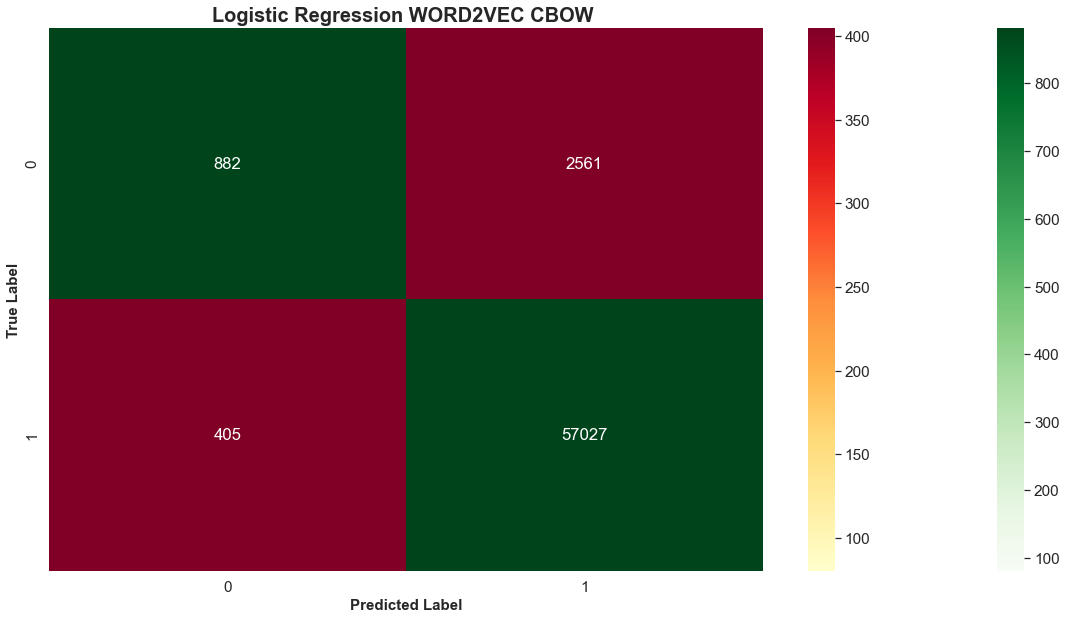

In [83]:
plt.figure(figsize=(20,10))
cm = confusion_matrix(test_y, y_pred)
class_label = [sorted(set(df["Değerlendirme"]))]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
off_diag_mask = np.eye(*df_cm.shape, dtype=bool)
sns.heatmap(df_cm,mask=~off_diag_mask, cmap='Greens', annot=True, fmt='d',vmax=80)
sns.heatmap(df_cm,mask=off_diag_mask, cmap='YlOrRd', annot=True, fmt='d',vmax=80)
plt.title("Logistic Regression WORD2VEC CBOW ",fontweight="bold",fontsize=20)
plt.xlabel("Predicted Label",fontweight="bold",fontsize=15)
plt.ylabel("True Label",fontweight="bold",fontsize=15)
plt.show()

## Derin Öğrenme

In [62]:
df["Müşteri Yorumu"]=df["Müşteri Yorumu"].astype('U')
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["Müşteri Yorumu"],
                                                                   df["Değerlendirme"], 
                                                                    random_state = 1)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(train_x)
X_train = vectorizer.transform(train_x)
X_test  = vectorizer.transform(test_x)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1737330   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,737,341
Trainable params: 1,737,341
Non-trainable params: 0
_________________________________________________________________


In [64]:
#history = model.fit(X_train, train_y,epochs=100,verbose=False,validation_data=(X_test, y_test),batch_size=10)

In [63]:
#loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
#print("Training Accuracy: {:.4f}".format(accuracy))
#loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
#print("Testing Accuracy:  {:.4f}".format(accuracy))

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_x)

In [70]:
X_train = tokenizer.texts_to_sequences(train_x)
X_test = tokenizer.texts_to_sequences(test_x)

In [71]:
vocab_size = len(tokenizer.word_index) + 1  
# Adding 1 because of reserved 0 index

In [119]:
print(train_x[2])


ürün bugün elime geçti fazla inceleme fırsatım olmadı ancak gözüme çarpan ilk usb bağlantısı pil kapağının altında güzel yer yapmış olmaları önceden aparatı kaybetmiş olarak özelliğini sevdim ayrıca dpi olması iyi tip farelerin çoğu dpi oluyor sizde benim masaüstü bilgisayarınızdan oyuncu faresi yüksek dpi ayarına alışmış biriyseniz windows ayarından fareyi hızlıya getirin fareyi sipariş verin pişman olmazsınız teşekkürler logitech


In [120]:
print(X_train[2])

[8, 1, 186, 2397, 23, 846, 790, 275, 716, 98, 582, 89, 1, 629, 987, 207, 2719, 846, 112, 222, 15, 1, 2, 5, 6]


In [72]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[666 188 164  67   3   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [15]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50
model = Sequential()

In [16]:
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

In [17]:
model.add(layers.Flatten())

In [18]:
model.add(layers.Dense(10, activation='relu'))

In [19]:
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           8920800   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 8,970,821
Trainable params: 8,970,821
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, train_y,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, test_y),
                    batch_size=100)

In [23]:
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)

In [24]:
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9994


In [25]:
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)

In [26]:
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.9466


In [ ]:
model.init_sims(replace=True)
model_name = "model_ilk"
model.save(model_name)

In [65]:
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [73]:
embedding_dim = 50

In [74]:
model = Sequential()

In [75]:
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

In [ ]:
model.add(layers.GlobalMaxPool1D())

In [ ]:
model.add(layers.Dense(10, activation='relu'))

In [ ]:
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [37]:
history = model.fit(X_train, train_y,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, test_y),
                    batch_size=100)

In [38]:
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)

In [39]:
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9992


In [40]:
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)

In [41]:
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.9563


In [45]:
model_name = "model_embedding"
model.save(model_name)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_embedding\assets


In [76]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

### CNN kullanarak 

In [49]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          17841600  
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 17,907,029
Trainable params: 17,907,029
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, train_y,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, test_y),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9986
Testing Accuracy:  0.9603


KeyError: 'acc'

In [84]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [85]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [86]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


In [105]:
# Main settings
epochs = 10
embedding_dim = 50
maxlen = 100
output_file = 'data/output.txt'

In [88]:
vocab_size

178416

In [89]:
# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])


In [90]:
model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=1000,
                            verbose=False)

In [91]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)

In [92]:
grid_result = grid.fit(X_train, train_y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [93]:
# Evaluate testing set
test_accuracy = grid.score(X_test, test_y)


In [108]:
# Save and evaluate results
prompt = input(f'finished ; write to file and proceed? [y/n]')
with open(output_file, 'a') as f:
    s = ('Running  data set\nBest Accuracy : {:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(grid_result.best_score_,grid_result.best_params_,test_accuracy)
    print(output_string)
    f.write(output_string)

finished ; write to file and proceed? [y/n]y
Running  data set
Best Accuracy : 0.9620
{'vocab_size': 178416, 'num_filters': 64, 'maxlen': 100, 'kernel_size': 7, 'embedding_dim': 50}
Test Accuracy : 0.9607




In [ ]:
my_text = ["güzel bir kitap tavsiye ederim",
           "kurulumu çok zor",
           "bu kitabı hiç beğenmedim",
           "daha iyi olabilir",
           "Dünyanın en aşağılık firması.Bu firmada çalışanların hepsine yazıklar olsun diyorum.Kötü ürün demek bu firmaya iltifat kalır 1/10",
           "Firma çalışanları çok ilgisiz",
           "Mükemmel bir ruj fiyatına göre çok güzel,kesinlikle tavsiye ederim",
           "Ayakkabı ayağıma büyük geldi,değiştirmek için gönderdim,3 gün içinde geldi,teşekkürler.",
           "Fiyat performas ürünü, beğendim",
           "Tam zamanında geldi.Teşekkürler"]

In [ ]:
predictions = model.predict(data)

In [ ]:
print(predictions[0])

In [ ]:
print(predictions[1])

0.48 doğrulukta olumsuza daha yakın

## Sonuçların Değerlendirilmesi